# Module Code & Module Title :CC6057NI Applied Machine Learning
#### Assessment Type: Coursework 
#### Semester 1 2024/25 Autumn
#### Student Name: Dipawoli Malla
#### London Met ID: 22085768

## Project Overview
The Applied Machine Learning module coursework delves into the research and development of machine learning models in a specific problem domain. In this coursework, research on dataset, exploration data analysis, data preprocessing and model development and evaluation of the chosen machine learning models for a problem domain in house price prediction.


## House Price Prediction
House price prediction is an application of machine learning that provides valuable insight into the real estate market.

The housing dataset used in this coursework is available on Kaggle under “House Prices: Advanced Regression Techniques”. The “train.csv” file contains the training data and “test.csv” contains the testing data. The training data contains data for 1460 rows which corresponds to 1460 house’s data and 80 columns which correspond to the feature of those houses. 

## Setup Environment

In [6]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [217]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load Training Dataset

In [8]:
df_training = pd.read_csv('../ML/data/train.csv')
df_training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In [10]:
df_training.shape

(1460, 81)

There are 1460 rows and 81 columns.

In [12]:
df_training.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Load Testing Dataset

In [15]:
df_test = pd.read_csv('../ML/data/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The difference between the training and testing dataset that testing dataset doesn't have target variable SalesPrice, which is why df_training set will be used as the whole dataset itself and processed further to split the data into train, test and validation sets for model training and evaluation.

In [17]:
print(df_training.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [18]:
print(df_training.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


### Summary Table for Features

In [20]:
numerical_features = df_training.select_dtypes(include=['number'])
categorical_columns = df_training.select_dtypes(include=['object'])

total_count_num = len(numerical_features.columns)  
total_count_category = len(categorical_columns.columns)  

print( f'The total number of features in the dataset are {total_count_num}')
print( f'The total number of features in the dataset are {total_count_category}')

The total number of features in the dataset are 38
The total number of features in the dataset are 43


### Target Variable: SalePrice that needs to be predicted

In [22]:
# Range of target value 'SalePrice'

print("Lowest value of the target SalePrice:", df_training['SalePrice'].min(), "\n"
      "Maximum value of the target SalePrice:", df_training['SalePrice'].max())

Lowest value of the target SalePrice: 34900 
Maximum value of the target SalePrice: 755000


In [23]:
df_training['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The price range of the house ranges from 34900 dollars to 75500 dollars which is valid value for house price. This shows that the data is reliable to work with.

<Axes: xlabel='SalePrice', ylabel='Count'>

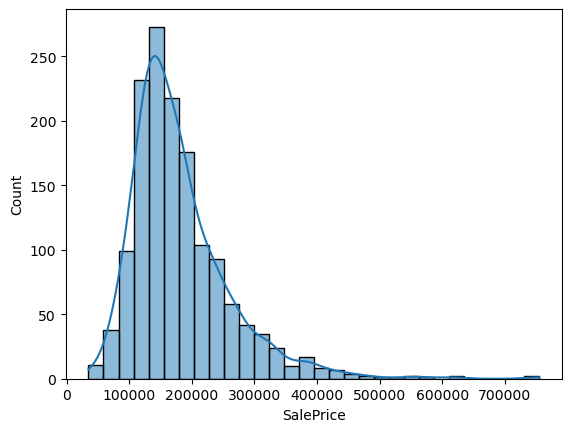

In [25]:
sns.histplot(df_training['SalePrice'], bins = 30,  kde=True)

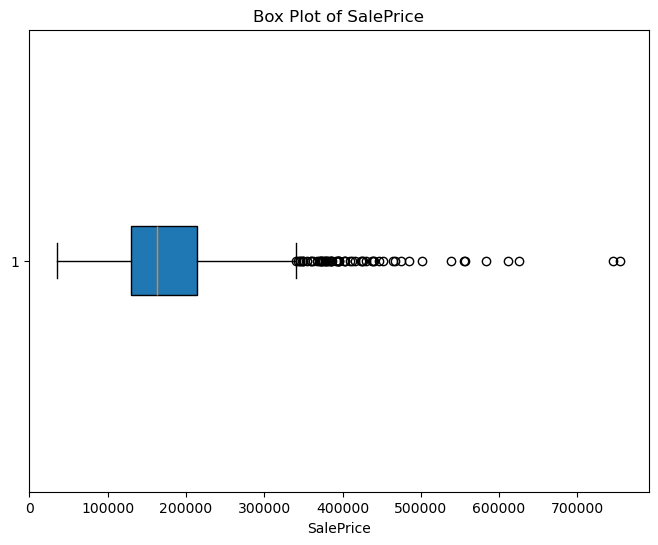

In [26]:
# Creating a box plot for 'SalePrice'
plt.figure(figsize=(8, 6))
plt.boxplot(df_training['SalePrice'], vert=False, patch_artist=True)
plt.title('Box Plot of SalePrice')
plt.xlabel('SalePrice')
plt.show()

Key Observations:
- The target value for SalePrice is rightly skewed which needs normalization.
- There are many outliers in the dataset which needs to be treated in the target variable.

## Exploration of Numerical features
While exploring the data, the numerical features of the dataset requires to be studied further for better analysis and modelling.

### Correlation Heatmap of numerical features

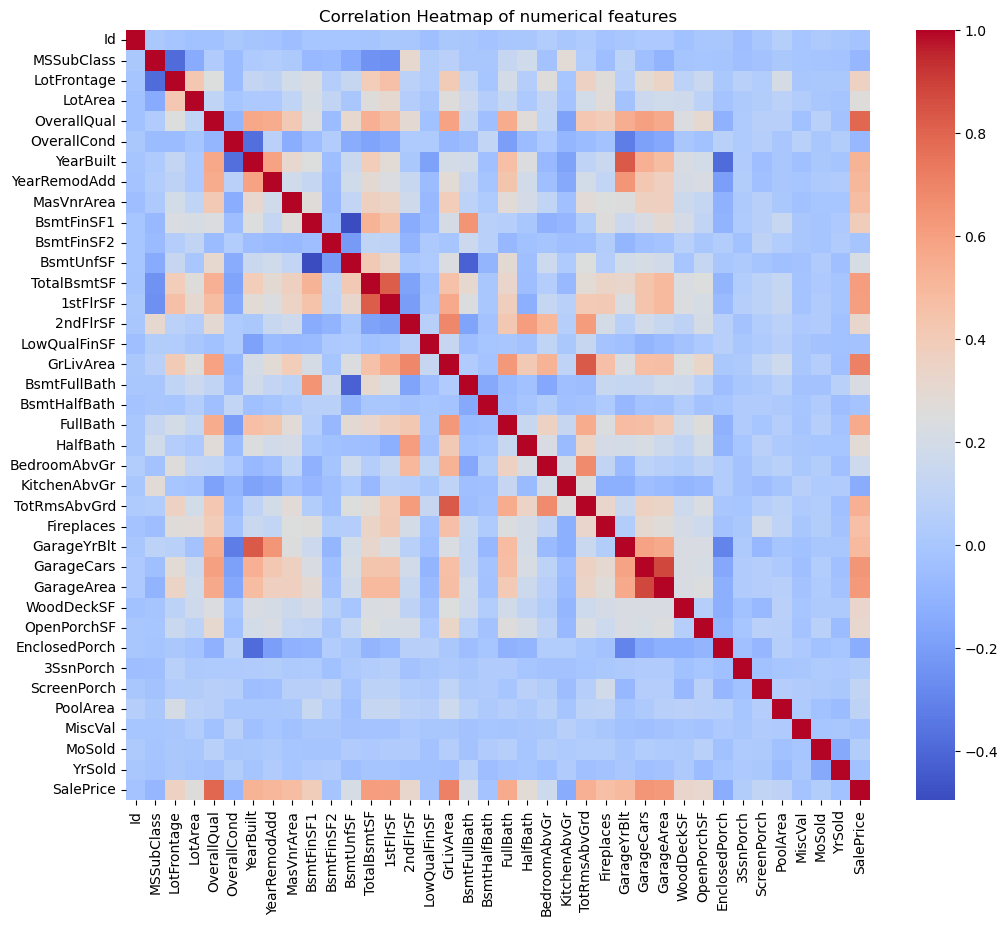

In [30]:
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of numerical features')
plt.show()

Text(99.74999999999999, 0.5, 'Features')

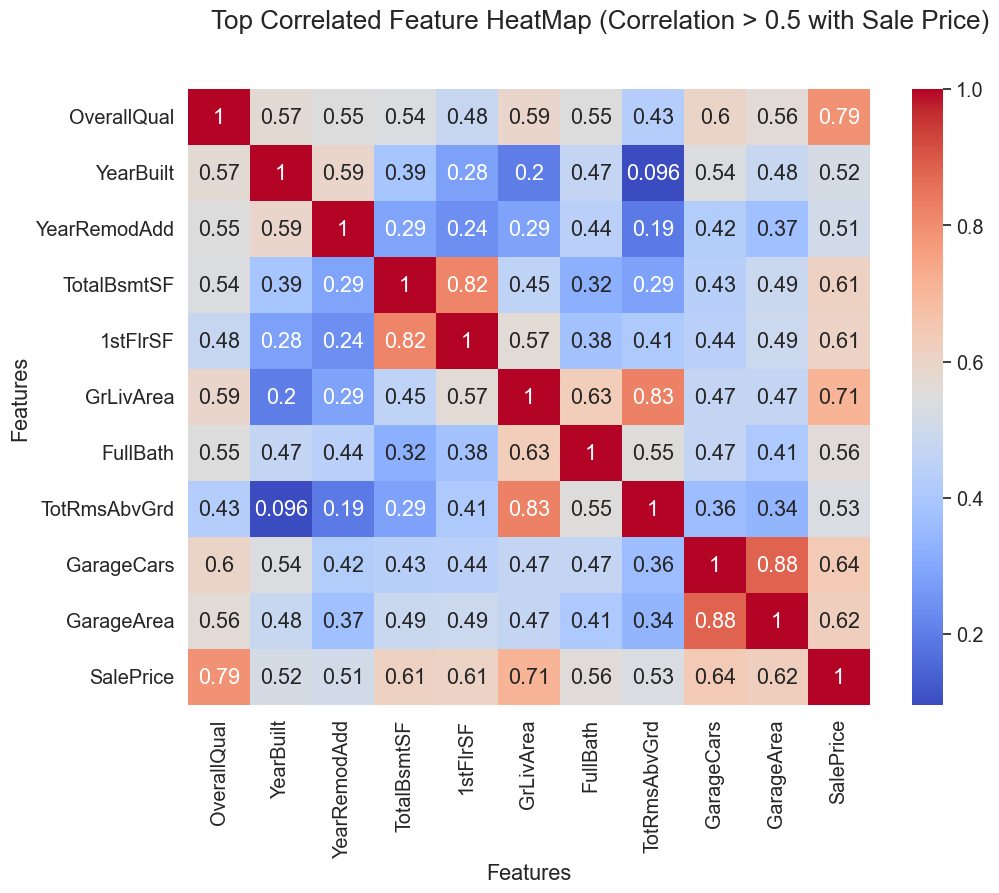

In [31]:
# most correlated features
corr_mat = numerical_features.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(df_training[top_corr].corr(),annot=True,cmap="coolwarm")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

- OverallQual and GrLivArea seem to be the most correlated to SalePrice

In [33]:
print("Correlation Values")
corr = numerical_features.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

### Feature Distributions and Scatter Plots of Top 8 most correlated features
To see relationships between features and the target, the plots of histograms and scatter plot is done.

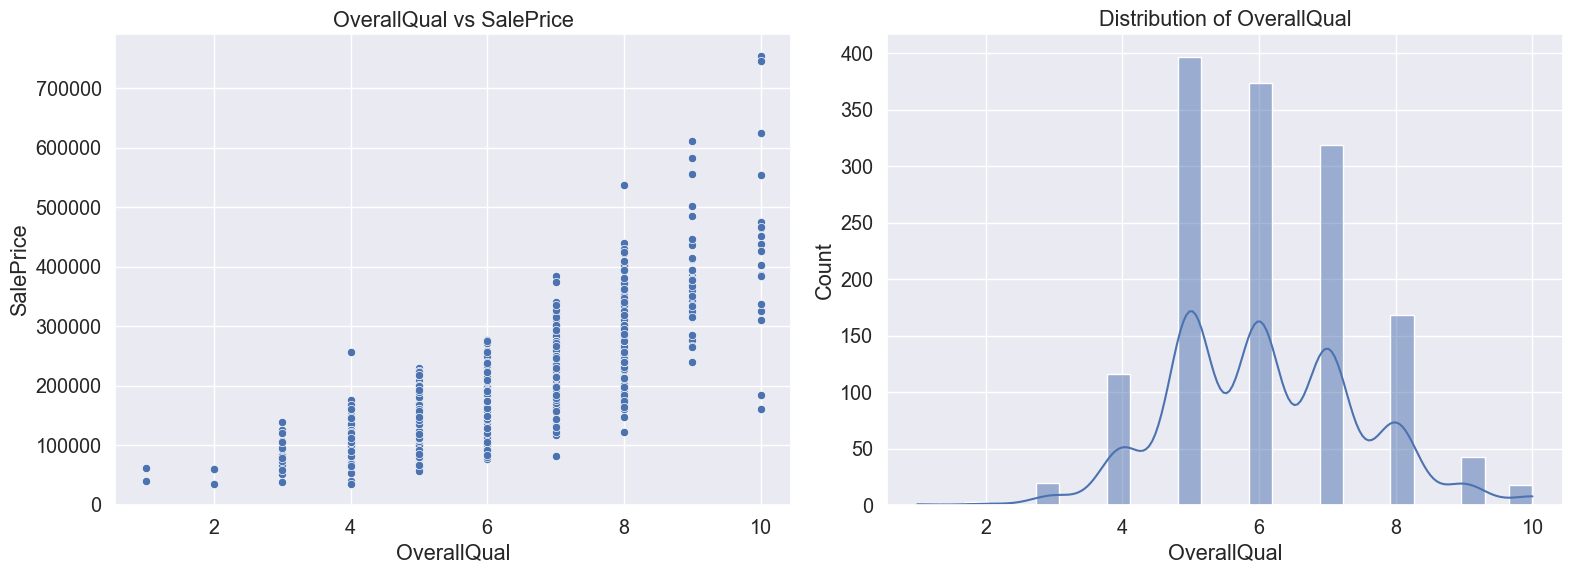

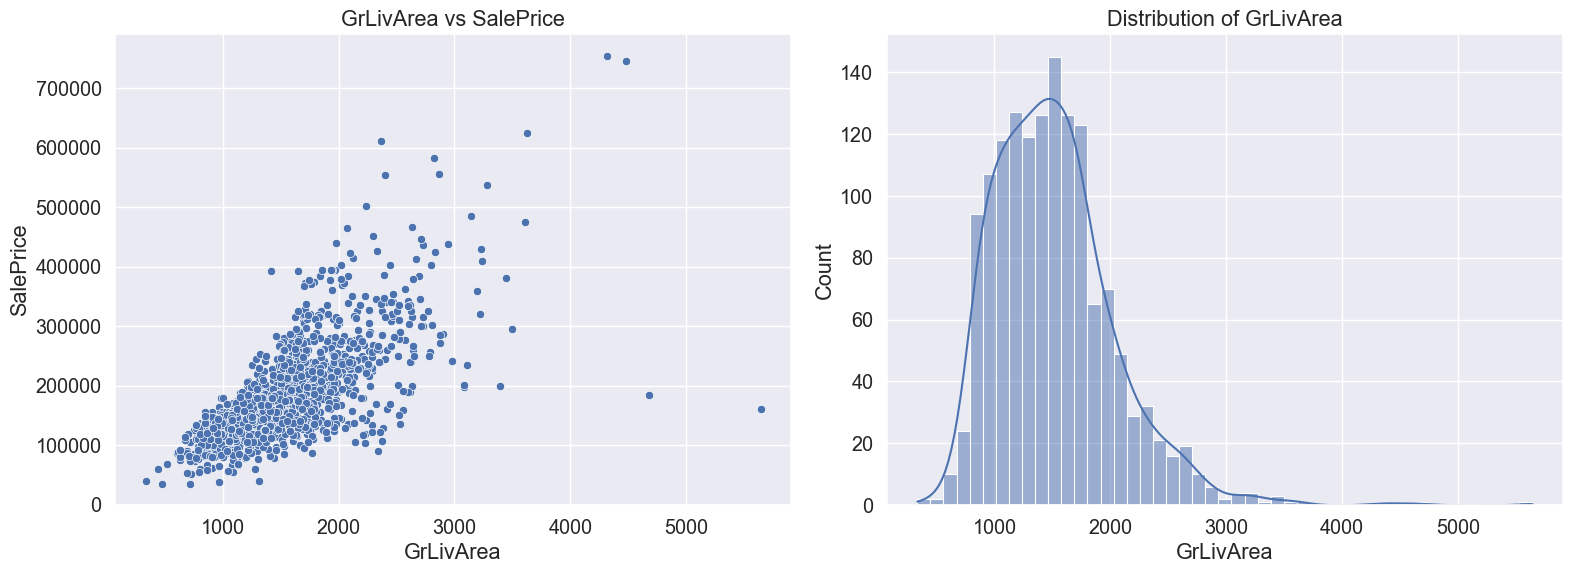

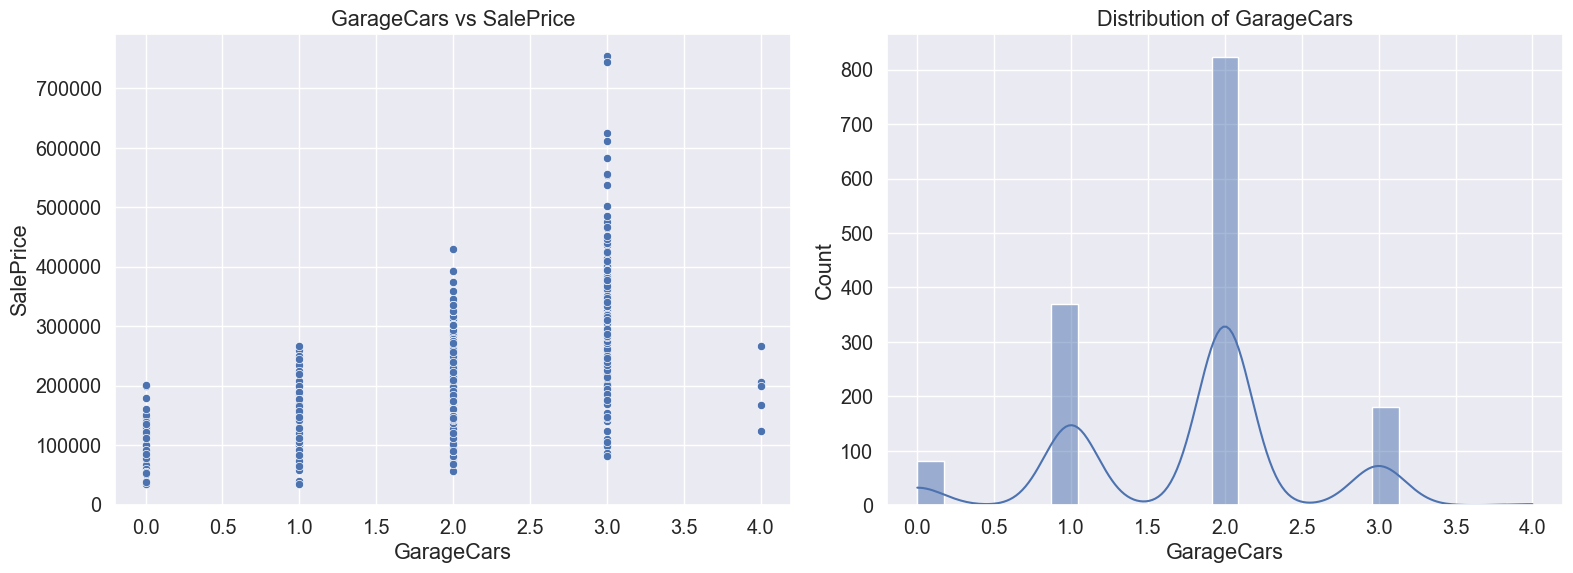

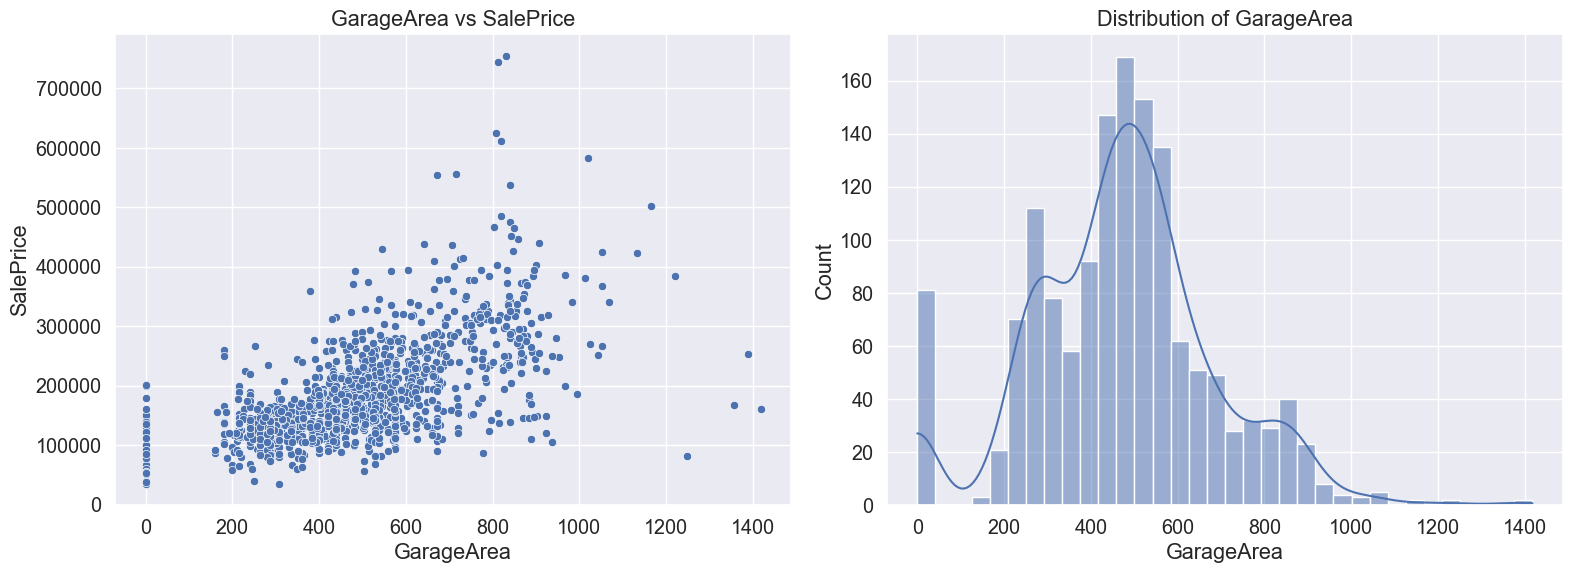

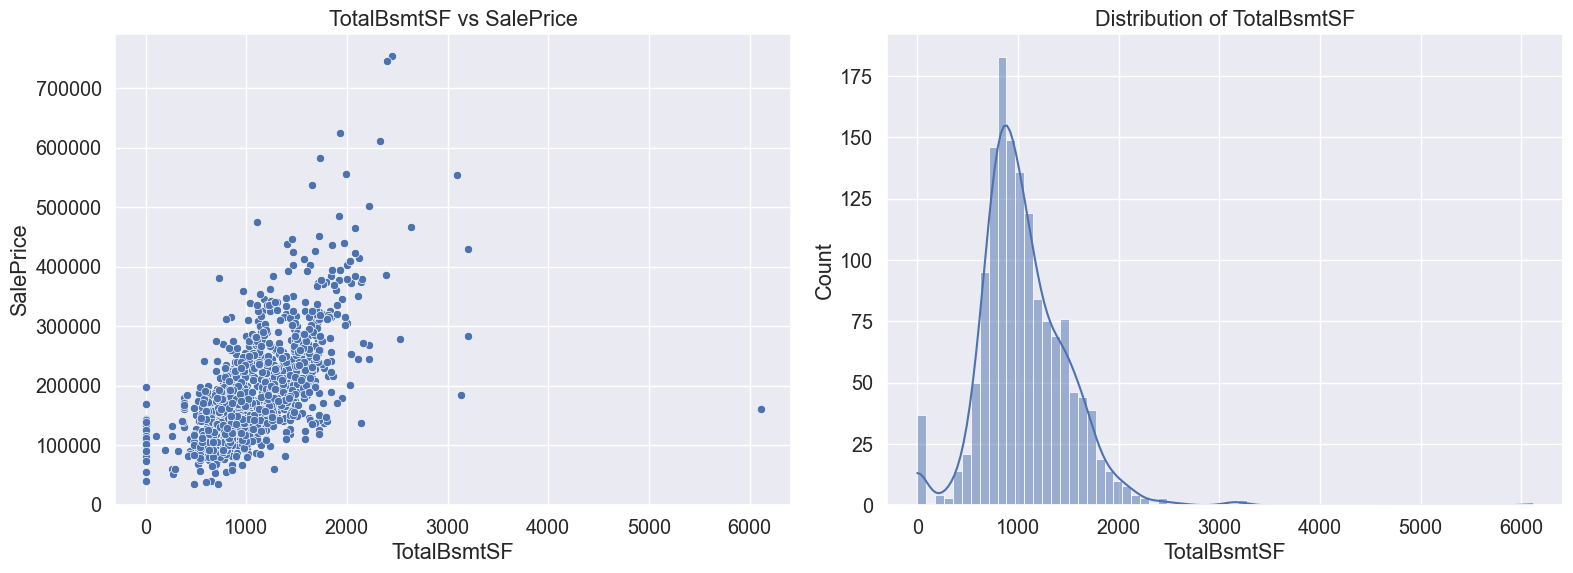

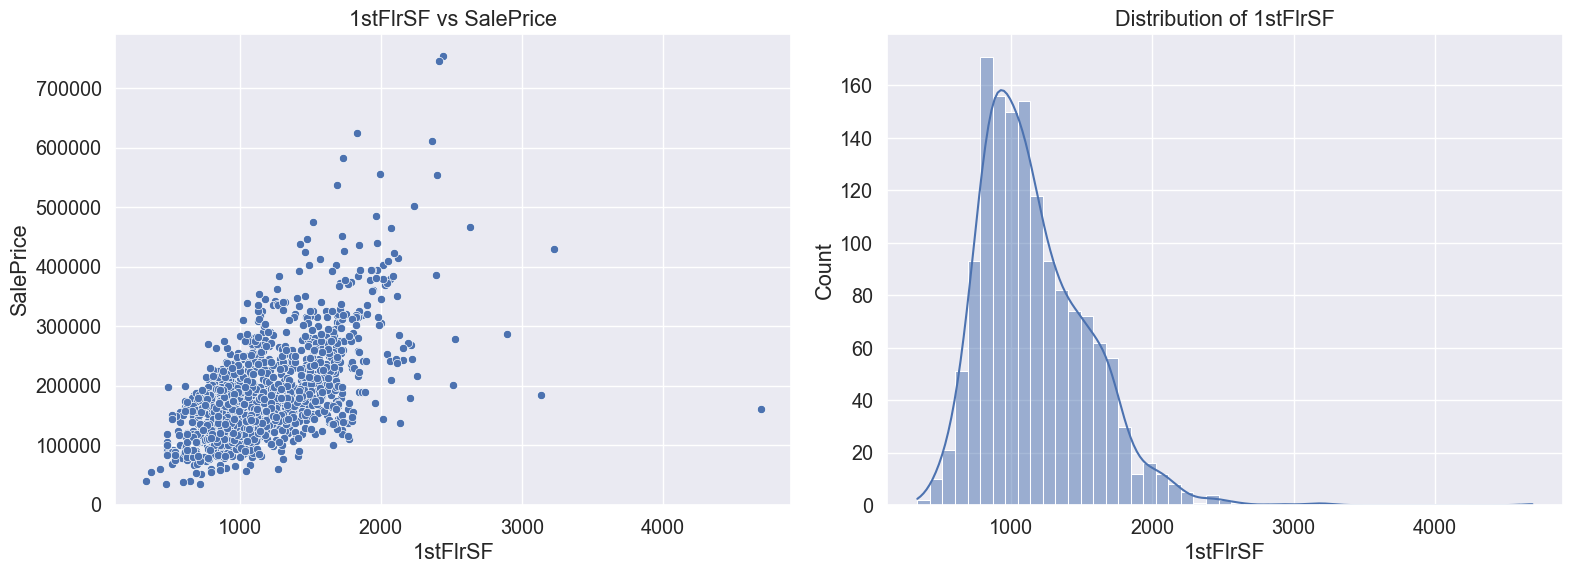

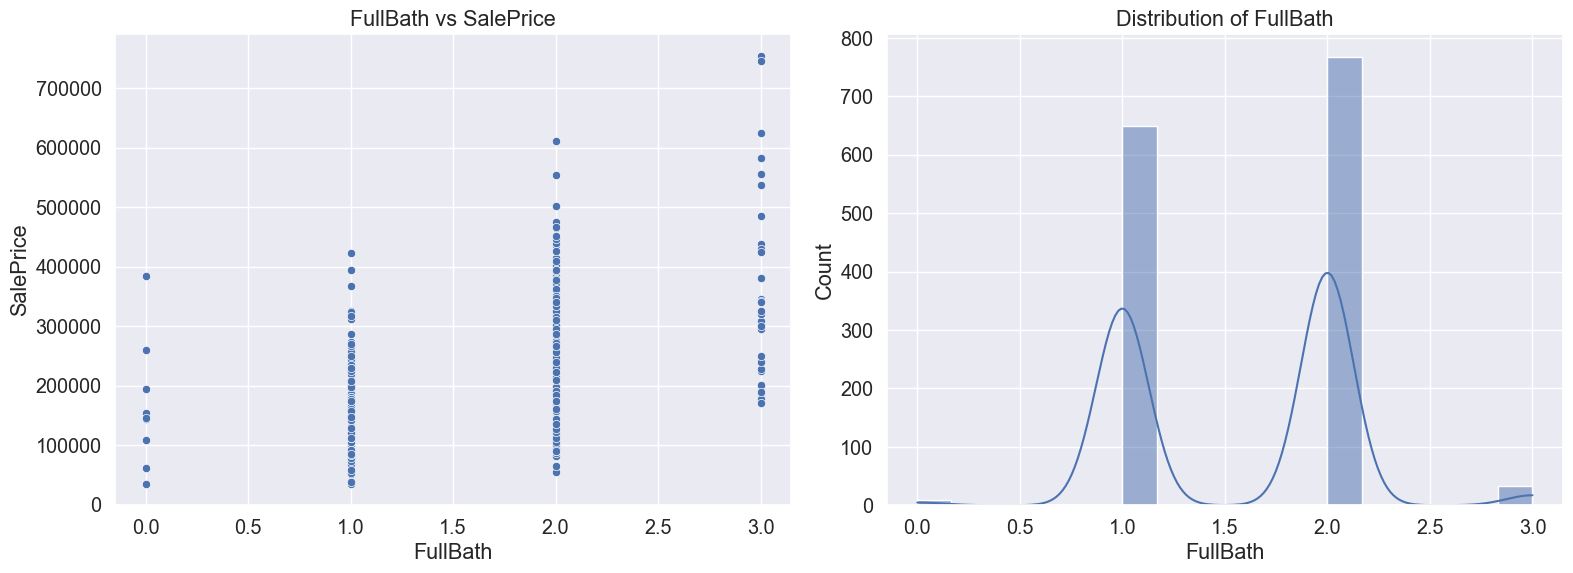

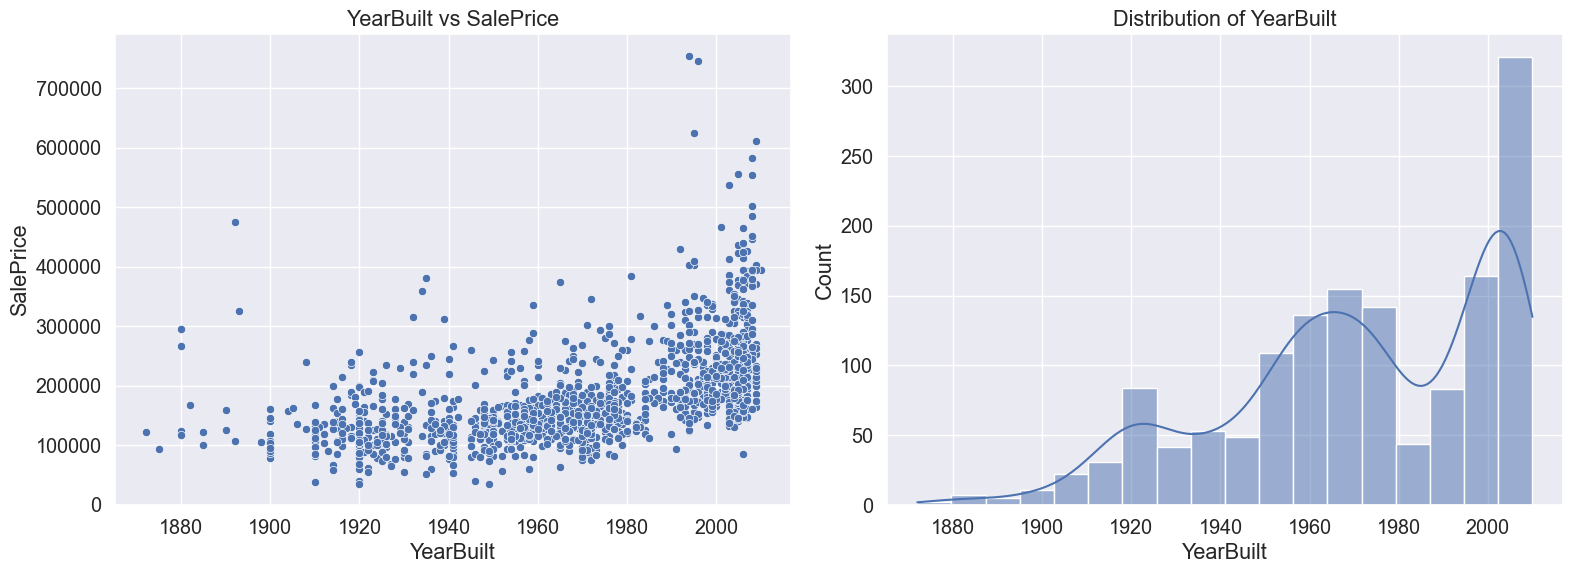

In [35]:
top_corr_features = [ 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']

for feature in top_corr_features:
    # Define the overall figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
    # Scatter plot of feature vs. SalePrice
    sns.scatterplot(x=df_training[feature], y=df_training['SalePrice'], ax=axes[0])
    axes[0].set_title(f'{feature} vs SalePrice')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('SalePrice')

    # Distribution plot of the feature
    sns.histplot(df_training[feature], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {feature}')
    axes[1].set_xlabel(feature)

    # Show the entire figure
    plt.tight_layout()
    plt.show()
    
    # Save the figure to a file
    plt.savefig(f'{feature}_plots.png')  # Save as PNG file
    plt.close()  # Close the figure to free up memory

### Feature Distributions and Scatter Plots of 5 least correlated features

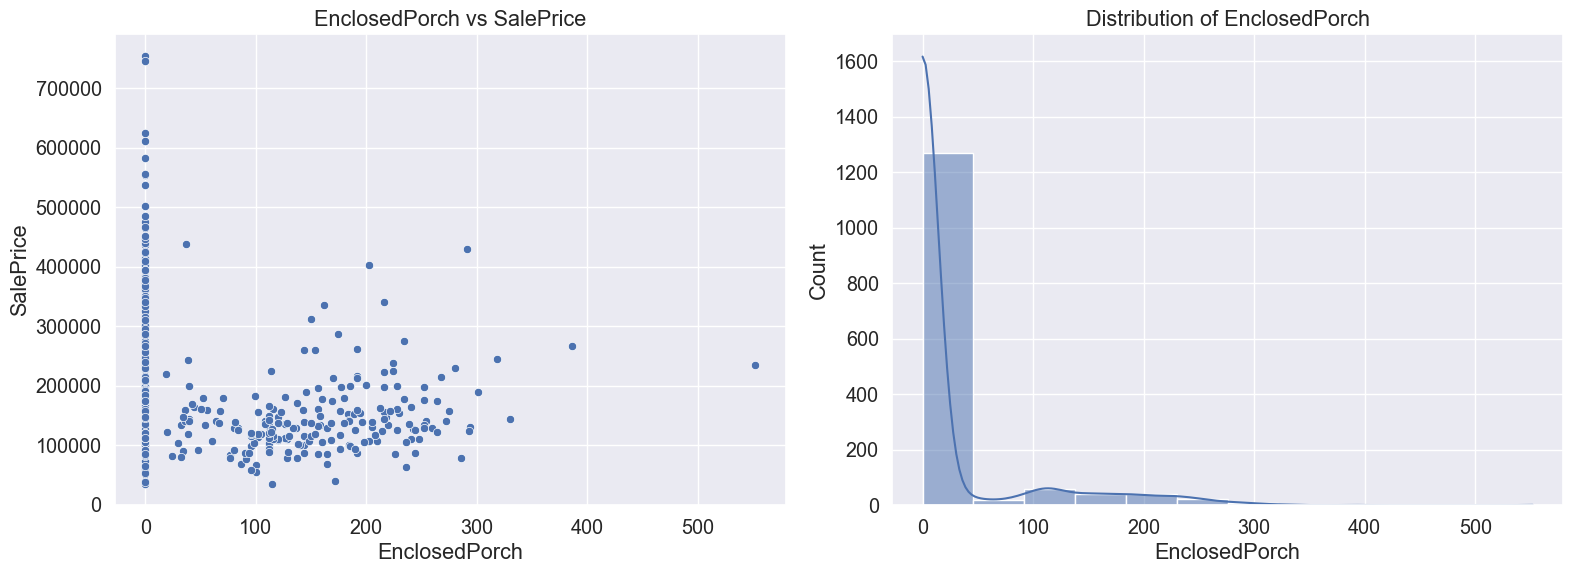

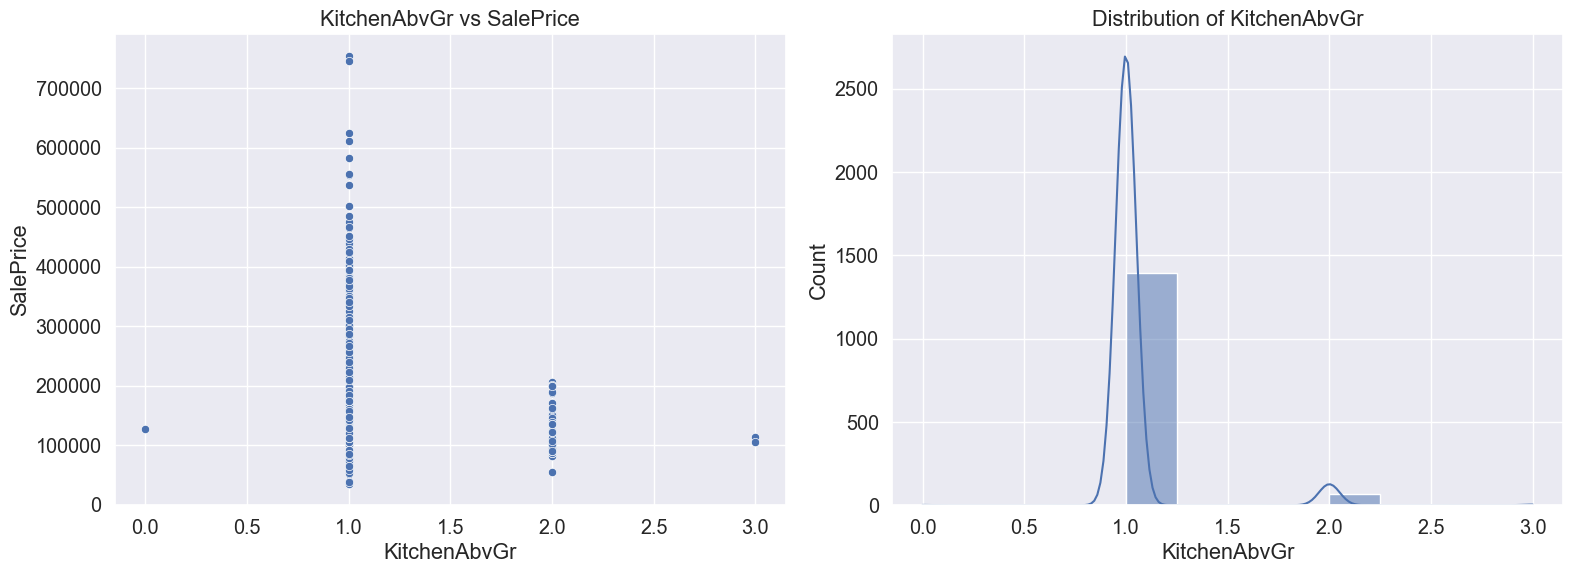

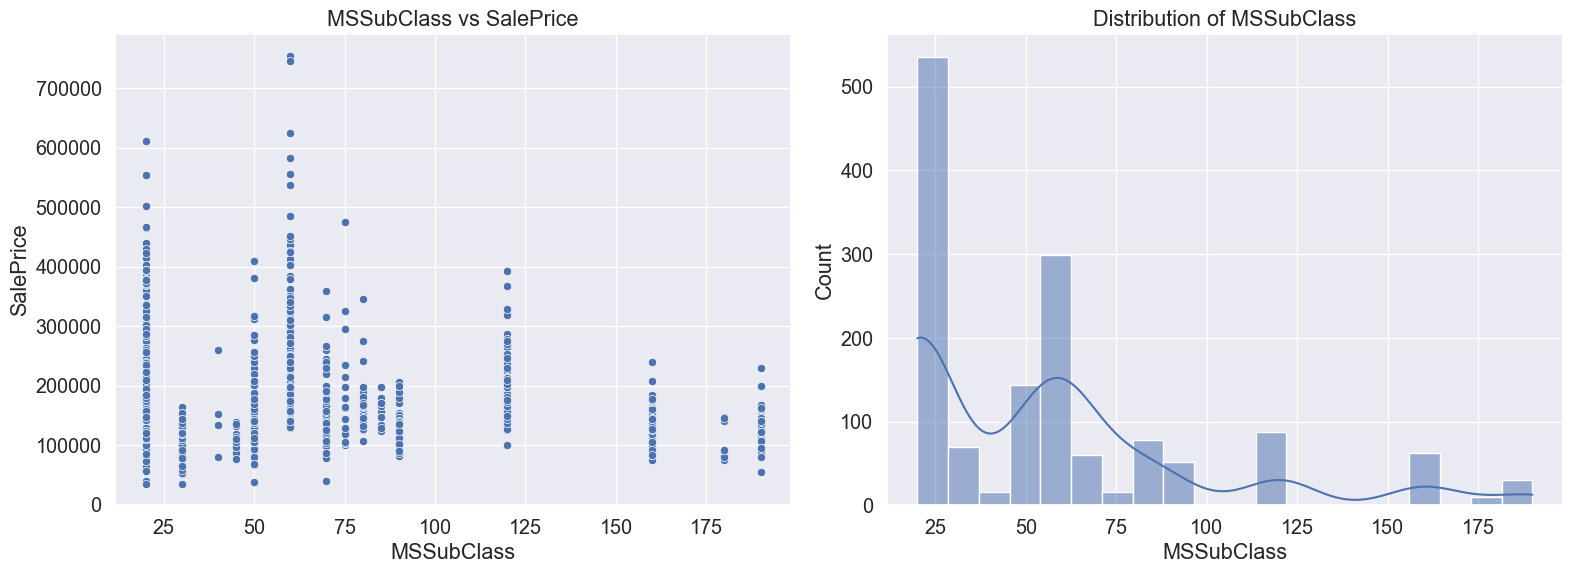

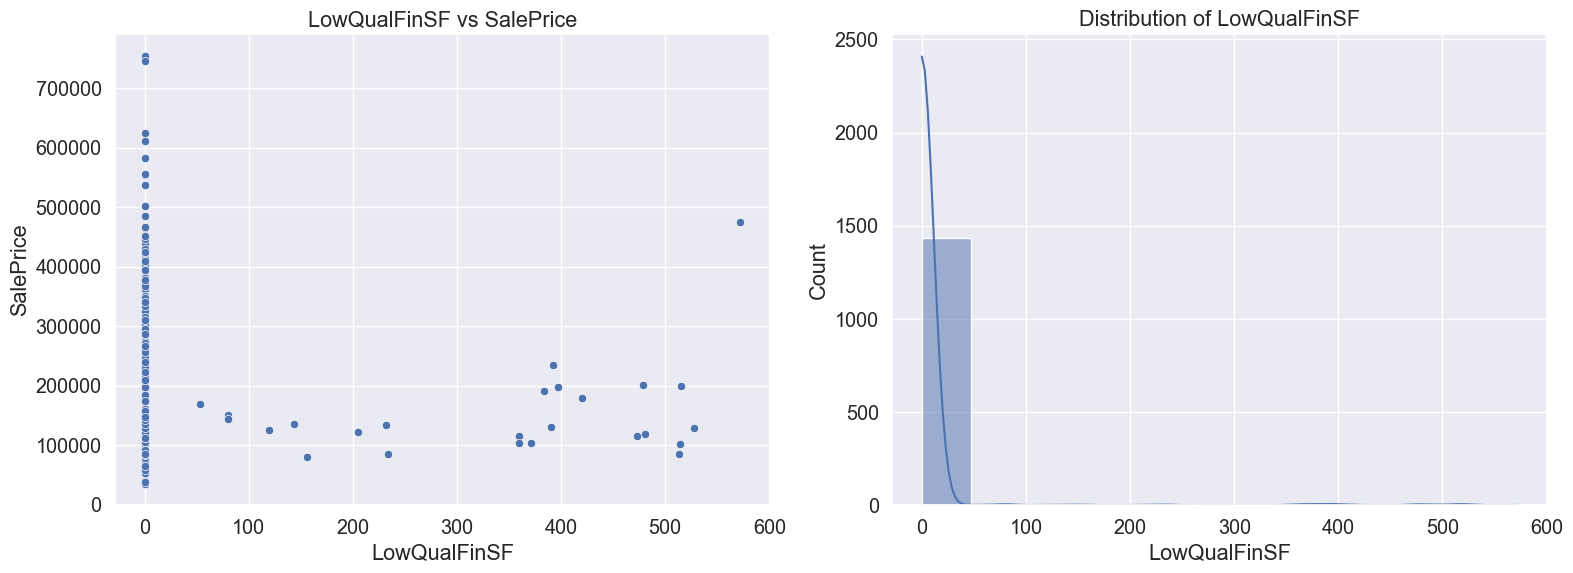

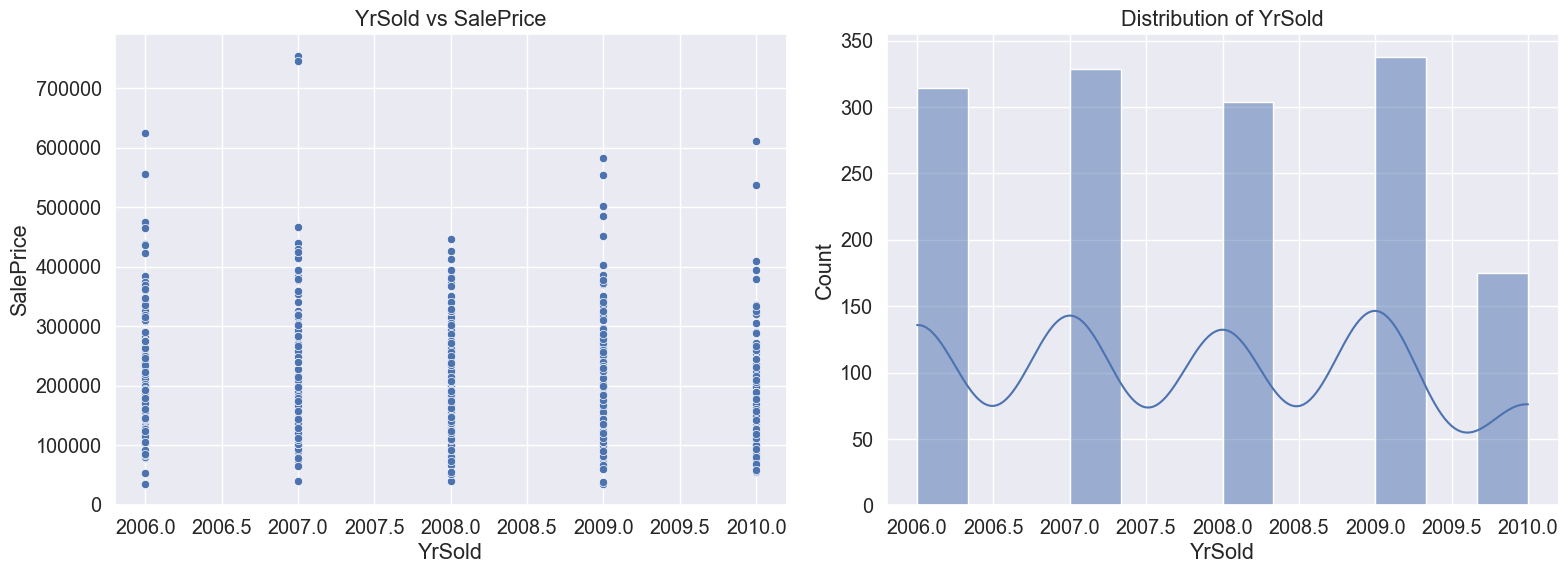

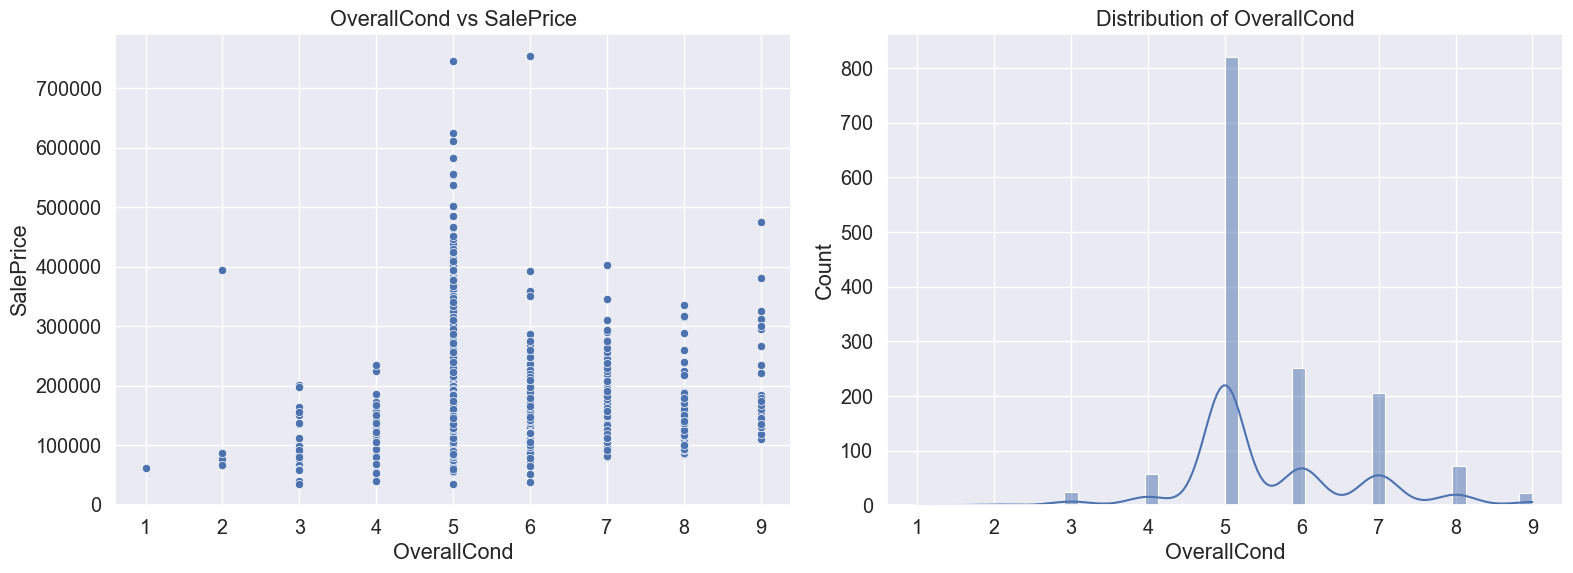

In [37]:
least_corr_features = ['EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']

for feature in least_corr_features:
    # Define the overall figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    # Scatter plot of feature vs. SalePrice
    sns.scatterplot(x=df_training[feature], y=df_training['SalePrice'], ax=axes[0])
    axes[0].set_title(f'{feature} vs SalePrice')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('SalePrice')

    # Distribution plot of the feature
    sns.histplot(df_training[feature], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {feature}')
    axes[1].set_xlabel(feature)

    # Show the entire figure
    plt.tight_layout()
    plt.show()
     # Save the figure to a file
    plt.savefig(f'{feature}_plots.png')  # Save as PNG file
    plt.close()  # Close the figure to free up memory

### Box Plot of categorical features
Comparing distributions across categories.

### Box plot of Overall Quality

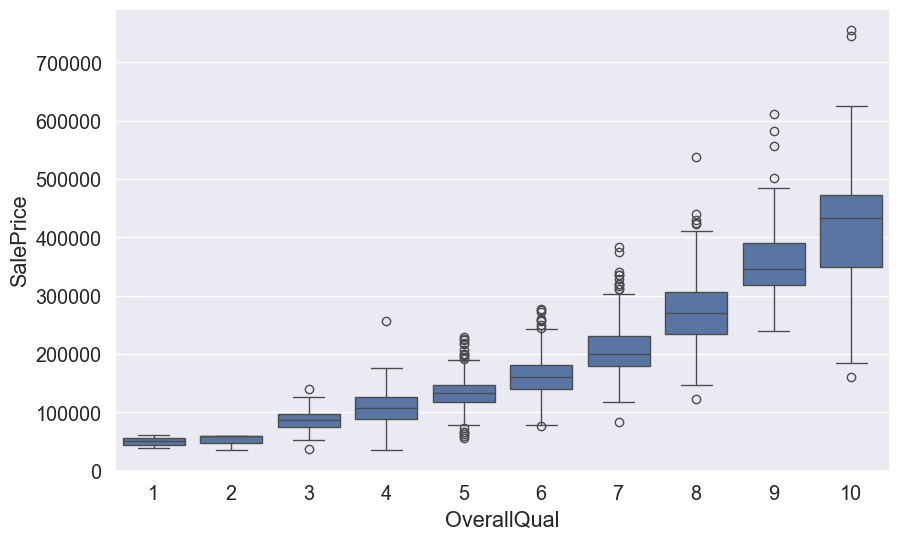

In [40]:
fig = plt.figure(figsize=(10,6))
data = pd.concat([df_training['SalePrice'], df_training['OverallQual']], axis=1)
sns.boxplot(x = df_training['OverallQual'], y="SalePrice", data = data)
 # Save the figure to a file
plt.savefig(f'{feature}_plots.png')  # Save as PNG file
plt.show()

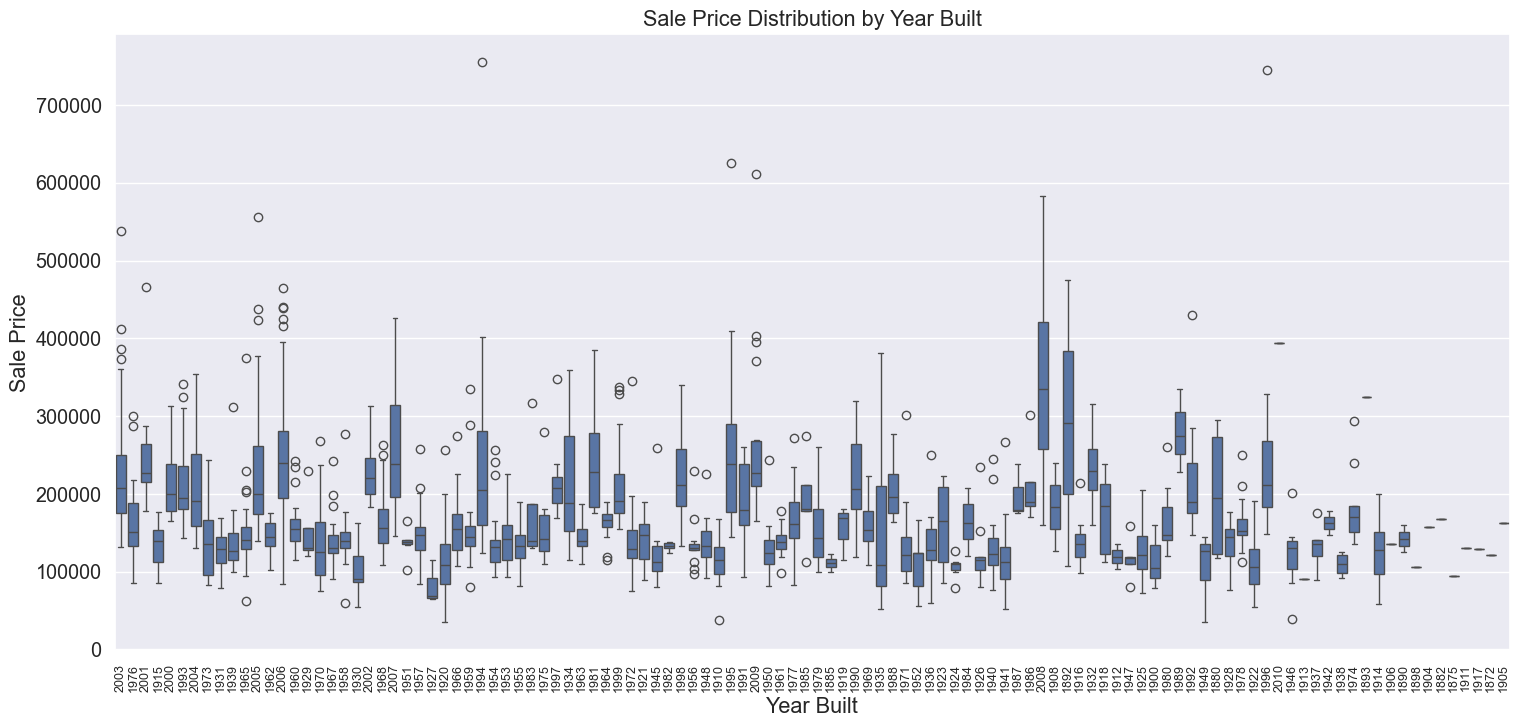

In [215]:
fig = plt.figure(figsize=(18, 8))

# Convert YearBuilt to string to treat it as a categorical variable
df_training['YearBuilt'] = df_training['YearBuilt'].astype(str)

# Create the boxplot
data = pd.concat([df_training['SalePrice'], df_training['YearBuilt']], axis=1)
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

# Adjust x-axis for better readability
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("Year Built") 
plt.ylabel("Sale Price") 
plt.title("Sale Price Distribution by Year Built")  # Optional: Add a title

plt.show()

#### Missing Data

In [44]:
# Function to see the missing data in a dataframe
def missing_data(df_missing, num):    
    # Total number of missing values
    total = df_missing.isnull().sum().sort_values(ascending=False)
    
    # Percentage of missing values
    percentage = (df_missing.isnull().sum() / df_missing.isnull().count() * 100).sort_values(ascending=False)
    
    # Number of unique values in each column
    no_unique_val = df_missing.nunique()
    
    # Data types of columns
    missing_data_types = df_missing.dtypes[total.index]
    
    # Creating a DataFrame to display missing data details
    missing_data = pd.concat([total, percentage, no_unique_val, missing_data_types], axis=1, 
                             keys=['Total Missing', '% Missing', 'Unique Values', 'Data Type'])
    
    # Count of features with missing values
    no_missing = (total > 0).sum()
    
    print(f"Number of features with missing values: {no_missing}")
    print(missing_data.head(num))

In [45]:
#training data    
missing_data(df_training,20)

Number of features with missing values: 19
              Total Missing  % Missing  Unique Values Data Type
PoolQC                 1453  99.520548              3    object
MiscFeature            1406  96.301370              4    object
Alley                  1369  93.767123              2    object
Fence                  1179  80.753425              4    object
MasVnrType              872  59.726027              3    object
FireplaceQu             690  47.260274              5    object
LotFrontage             259  17.739726            110   float64
GarageYrBlt              81   5.547945             97   float64
GarageCond               81   5.547945              5    object
GarageType               81   5.547945              6    object
GarageFinish             81   5.547945              3    object
GarageQual               81   5.547945              5    object
BsmtFinType2             38   2.602740              6    object
BsmtExposure             38   2.602740              4    obje

There are 19 columns with missing values with 3 of them are  numerical features and 15 of them are categorical features. 

## Data Preprocessing

### Handle Missing Values

#### Dropping Columns

In [50]:
#Dropping any features that have more that 45% of the missing values
df_training = df_training.drop(['PoolQC','MiscFeature', 'Alley', 'MasVnrType', 'FireplaceQu', 'Fence','Id'],axis=1)

6 columns/features are dropped since they have more than 45% missing values out of 19 columns.

In [52]:
df_training.shape

(1460, 74)

- After removing five features from 80, there are remaining 74 features.
- The Id column in the dataset typically serves as a unique identifier and doesn't carry meaningful information for predictive modeling or data distribution analysis which is why it has also been dropped.
- Other features will missing values will be imputed.

#### Imputing Columns for categorical features
To treat missing values for categorical features, based on their reference and understanding the model, mode or the value None will be imputed.

Mode is imputed for missing values with the most frequent category since they are categorical features.

The categorical features are 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',  'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond',  'BsmtQual', 'Electrical'.

In [55]:
# Null value likely means No Garage build in the house, so filled as "None" (since these are categorical features)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_training[col] = df_training[col].fillna('None')

# Null value likely means No Basement build in the house, so fill as "None" (since these are categorical features)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_training[col] = df_training[col].fillna('None')

# Only one null value so fill as the most frequent value(mode)
df_training['Electrical'] = df_training['Electrical'].fillna(df_training['Electrical'].mode()[0])

#### Imputing Columns for numerical features
Median/Mean is imputed for missing values with the most frequent category since they are numerical features.

In [57]:
# List of numerical features
# num_features = 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'

df_training["MasVnrArea"] = df_training["MasVnrArea"].fillna(0)      #so fill as  0

 # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
df_training["LotFrontage"] = df_training["LotFrontage"].fillna(df_training["LotFrontage"].median())

 # Null value likely means No Garage 
df_training["GarageYrBlt"] = df_training["GarageYrBlt"].fillna(0)      #so fill as  0

### Encode Variables

To understand the categorical values better and to properly encode them, creating a new dataframe as a good option.

In [110]:
##update numerical features after dropping table
numerical_features = df_training.select_dtypes(include=['number'])

In [112]:
ordinal_cols = [ "OverallQual", "OverallCond", "ExterQual", "ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC",
    "KitchenQual","GarageFinish","GarageQual","GarageCond","MSSubClass"]

# Check the data types of the columns in the list
print (df_training[ordinal_cols].dtypes)

OverallQual     int64
OverallCond     int64
ExterQual       int32
ExterCond       int32
BsmtQual        int32
BsmtCond        int32
BsmtExposure    int32
BsmtFinType1    int32
BsmtFinType2    int32
HeatingQC       int32
KitchenQual     int32
GarageFinish    int32
GarageQual      int32
GarageCond      int32
MSSubClass      int64
dtype: object


These columns contain values that are stored as numbers, but the numbers do not represent true numerical data (e.g., for calculations like addition or averaging). Instead, the values represent ordinal data, meaning they indicate a ranked or ordered relationship. For example, a higher number might signify a better quality or condition. To properly encode this ordinal information, we need to use a Label Encoder, which can assign meaningful numerical labels based on the order of the categories.

In [114]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in ordinal_cols:
    df_training[col] = label_encoder.fit_transform(df_training[col])
        # Print the mapping of categories to numbers
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Label Encoding for {col}: {label_mapping}")

Label Encoding for OverallQual: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Label Encoding for OverallCond: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
Label Encoding for ExterQual: {0: 0, 1: 1, 2: 2, 3: 3}
Label Encoding for ExterCond: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Label Encoding for BsmtQual: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Label Encoding for BsmtCond: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Label Encoding for BsmtExposure: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Label Encoding for BsmtFinType1: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
Label Encoding for BsmtFinType2: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
Label Encoding for HeatingQC: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Label Encoding for KitchenQual: {0: 0, 1: 1, 2: 2, 3: 3}
Label Encoding for GarageFinish: {0: 0, 1: 1, 2: 2, 3: 3}
Label Encoding for GarageQual: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
Label Encoding for GarageCond: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
Label Encoding for MSSubClass: {0: 0, 1: 1, 2: 2, 3: 3, 

When performing transformations like df_training[col] = label_encoder.fit_transform(df_training[col]), it directly updates the column values in the df_training DataFrame

In [127]:
df_training.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,0,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,5,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,6,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


### Label Encoding to Categrorical  Features

In this project, both One-Hot Encoding and Label Encoding are applied to handle categorical features for compatibility with different models. Label Encoding assigns a unique numerical value to each category within a feature. While this may introduce an ordinal assumption, it works well with tree-based models like Random Forest, as these models are not affected by the numerical order of encoded labels.

##### Label Encoding to Categorical values like MSZoning
MSZoning: Identifies the general zoning classification of the sale.
- A	Agriculture
- C	Commercial
- FV	Floating Village Residential
- I	Industrial
- RH	Residential High Density
- RL	Residential Low Density
- RP	Residential Low Density Park
- RM	Residential Medium Density

After using label encoder, these values change from 1 to 8 for eg : A - 1 and RM - 8

In [116]:
#Updating categorical columns after dropping the columns
categorical_columns = df_training.select_dtypes(include=['object'])

In [118]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    # Fit and transform the column
    df_training[col] = label_encoder.fit_transform(df_training[col])
    #fit_transform(): First, fit() learns the mapping from unique string values to numeric labels.
    #Then, transform() applies this mapping to the column data, converting it into numeric labels.
    
    # Print the mapping of categories to numbers
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Label Encoding for {col}: {label_mapping}")

# Save the cleaned dataset with encoded columns
cleaned_data_path = "cleaned_data_label_encoded.csv"
df_training.to_csv(cleaned_data_path, index=False)

print(f"The cleaned dataset with label-encoded categorical columns has been saved to {cleaned_data_path}.")

The cleaned dataset with label-encoded categorical columns has been saved to cleaned_data_label_encoded.csv.


### One Hot encoding to Categorical Features

One-Hot Encoding is used to transform each categorical feature into binary columns, ensuring no ordinal relationship is implied between categories. This method is particularly suitable for models like Linear Regression, Lasso, and Support Vector Regression (SVR), which rely on numerical relationships and cannot handle categorical data directly.

In [134]:
#Updating categorical columns after dropping the columns
categorical_columns = df_training.select_dtypes(include=['object'])

In [138]:
# Instantiate the OneHotEncoder with drop="first"
ohe = OneHotEncoder(sparse_output=False, drop="first")

# Fit and transform the categorical columns
X_ohe = ohe.fit_transform(df_training[categorical_columns])

# Create a DataFrame for the One-Hot Encoded data
data_one_hot_encoded = pd.DataFrame(
    X_ohe,
    columns=ohe.get_feature_names_out(),  # No need to pass categorical_columns again
    index=df_training.index  # Preserve the original index
)

# Concatenate the encoded data back to the original DataFrame (optional)
df_final = pd.concat([df_training.drop(columns=categorical_columns), data_one_hot_encoded], axis=1)

In [140]:
# Save the cleaned dataset
cleaned_data_path = 'data_one_hot_encoded.csv'
df_final.to_csv(cleaned_data_path, index=False)
print(f"The cleaned dataset with one-hot encoded categorical columns has been saved to {cleaned_data_path}.")

The cleaned dataset with one-hot encoded categorical columns has been saved to data_one_hot_encoded.csv.


In [142]:
linear_df = pd.read_csv('./data_one_hot_encoded.csv')
print(f'The shape of linear df is {linear_df.shape}')

The shape of linear df is (1460, 74)


In [144]:
linear_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,0,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,5,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,6,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [146]:
tree_df = pd.read_csv('./cleaned_data_label_encoded.csv')
print(f'The shape of tree df{tree_df.shape}')

The shape of tree df(1460, 74)


In [76]:
tree_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,0,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,5,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,6,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


## Split Data
Split data into training and testing sets and validation 

In [148]:
# Define the target variable and features for linear
X_linear = linear_df.drop(['SalePrice'],axis=1)
y_linear = linear_df['SalePrice']                

X_tree = tree_df.drop(['SalePrice'],axis=1)
y_tree = tree_df['SalePrice']                


# Split into train and test for linear models
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)

# Split into train and test for tree models
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

# Print the sizes of each dataset
print(f"Training set size for linear: {X_train_linear.shape[0]}")
print(f"Training set size for tree: {X_train_tree.shape[0]}")
print(f"Test set size for linear: {y_test_linear.shape[0]}")
print(f"Test set size for tree: {y_test_linear.shape[0]}")

Training set size for linear: 1022
Training set size for tree: 1022
Test set size for linear: 438
Test set size for tree: 438


Here in step 1, test_size=0.3 specifies that 30% of the dataset will go into the testing set, and the remaining 70% will be used for training (X_train, y_train).
- X_train_linear, y_train_linear: For linear models.
- X_train_tree, y_train_tree: For tree-based models.

## Build Model

### Train Model

#### Model training of Linear Regression

In [150]:
# --- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

LinearRegression()

In [151]:
# Intercept of the linear regression model
print("Intercept of the Linear Regression model:", linear_model.intercept_)
# Coefficients of the linear regression model
print("Coefficients of the Linear Regression model:", linear_model.coef_)

Intercept of the Linear Regression model: 307873.36590922764
Coefficients of the Linear Regression model: [-1.88467791e+03 -2.23642412e+03 -1.84200153e+02  2.96378692e-01
  2.00936327e+04 -1.12803824e+03  4.02149312e+03 -5.82345631e+04
  6.60818841e+01  1.26726445e+04  4.84105390e+02 -4.99049111e+02
 -1.44706788e+04 -1.37271236e+03 -1.89055189e+03  1.26430719e+04
  3.86022874e+03  1.67984770e+02  3.56746562e+01  3.00096029e+03
  3.80460054e+03 -1.43252097e+03  6.00533971e+02  1.59075612e+01
 -8.16070092e+03  1.03489889e+03  1.35758983e+03 -5.83407885e+03
  2.60050521e+03 -4.29857901e+03 -8.07971662e+02  1.18152337e+00
  3.41527340e+02  2.68330614e+00 -4.43838593e+00 -5.73556509e-01
 -3.32737082e+03 -4.06929286e+02  1.23364874e+03 -4.78371018e+02
  1.55019719e+01  1.79848277e+01 -6.17778959e+00  2.73090100e+01
  9.69457413e+03  1.25556687e+03  2.86538446e+03 -8.77310292e+02
 -2.87489873e+03 -1.14675319e+04 -9.80647204e+03  4.45222464e+03
  4.41743221e+03  6.25013114e+03 -1.11752545e+02 

#### Model training of Lasso Regression

In [153]:
# --- Lasso Regression ---
lasso_model = Lasso(alpha=10.0, max_iter=10000)
lasso_model.fit(X_train_linear, y_train_linear)

C:\Users\nepal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.098e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10.0, max_iter=10000)

#### Model training of Random Forest Regression

In [155]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tree, y_train_tree)

RandomForestRegressor(random_state=42)

#### Model training of Support Vector Regressor

In [157]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  
svr_model.fit(X_train_linear, y_train_linear)

SVR()

### Make Predictions

#### Model Prediction of Linear Regression

In [160]:
# Predict and evaluate
y_train_pred = linear_model.predict(X_train_linear)
y_test_pred = linear_model.predict (X_test_linear)

print("Linear Regression:")
print(f"Train RMSE: {root_mean_squared_error(y_train_linear, y_train_pred):.4f}")
print(f"Test RMSE: {root_mean_squared_error(y_test_linear, y_test_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test_linear, y_test_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test_linear, y_test_pred):.4f}")
print(f"Test R^2: {r2_score(y_test_linear, y_test_pred):.4f}\n")

Linear Regression:
Train RMSE: 31007.7493
Test RMSE: 32961.3567
Test MSE: 1086451037.3922
Test MAE: 22054.8814
Test R^2: 0.8443



#### Model Prediction of Lasso Regression

In [162]:
# Predict and evaluate
y_train_pred = lasso_model.predict(X_train_linear)
y_test_pred = lasso_model.predict (X_test_linear)

print("Linear Regression:")
print(f"Train RMSE: {root_mean_squared_error(y_train_linear, y_train_pred):.4f}")
print(f"Test RMSE: {root_mean_squared_error(y_test_linear, y_test_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test_linear, y_test_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test_linear, y_test_pred):.4f}")
print(f"Test R^2: {r2_score(y_test_linear, y_test_pred):.4f}\n")

Linear Regression:
Train RMSE: 31010.6249
Test RMSE: 32954.0659
Test MSE: 1085970460.2742
Test MAE: 22026.6301
Test R^2: 0.8444



#### Model Prediction of Random Forest Regressor

In [164]:
# Predict and evaluate
y_train_pred = random_forest_model.predict(X_train_tree)
y_test_pred = random_forest_model.predict(X_test_tree)

# Evaluate on the training set
train_rmse = root_mean_squared_error(y_train_tree, y_train_pred)
train_mae = mean_absolute_error(y_train_tree, y_train_pred)
train_mse = mean_squared_error(y_train_tree, y_train_pred)

# Evaluate on the test set
test_rmse = root_mean_squared_error(y_test_tree, y_test_pred)
test_mae = mean_absolute_error(y_test_tree, y_test_pred)
test_mse = mean_squared_error(y_test_tree, y_test_pred)

# Print results
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}")

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R^2: {r2_score(y_test_tree, y_test_pred):.4f}\n")

Random Forest Model:
Train RMSE: 11826.8296
Train MAE: 6803.1734
Train MSE: 139873898.3053
Test RMSE: 26269.1130
Test MAE: 16725.2574
Test MSE: 690066300.3967
Test R^2: 0.9011



#### Model Prediction of Support Vector Regressor

In [166]:
# Predict and evaluate
y_train_pred = svr_model.predict(X_train_linear)
y_test_pred = svr_model.predict (X_test_linear)

print("Linear Regression:")
print(f"Train RMSE: {root_mean_squared_error(y_train_linear, y_train_pred):.4f}")
print(f"Test RMSE: {root_mean_squared_error(y_test_linear, y_test_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test_linear, y_test_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test_linear, y_test_pred):.4f}")
print(f"Test R^2: {r2_score(y_test_linear, y_test_pred):.4f}\n")

Linear Regression:
Train RMSE: 79262.7858
Test RMSE: 84860.0284
Test MSE: 7201224419.0616
Test MAE: 57037.3493
Test R^2: -0.0320



## Further Data Preprocessing

The training data for SalesPrice is rightly skewed, which is why it has to be treated. First, applying log transformation to compress large values and stretch smaller ones which reduces the skewness.

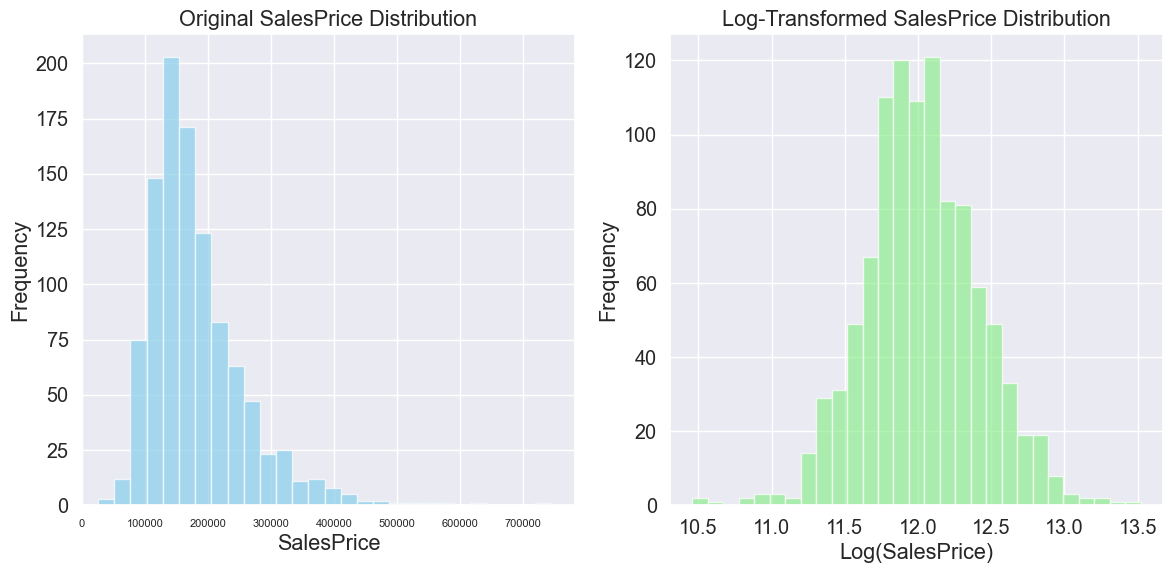

In [169]:
# Apply log transformation to y_train which is a pandas Series
y_train_log = np.log1p(y_train_linear)  # log(1 + SalesPrice)

# Define bins for original and log-transformed values separately
bins_original = np.linspace(0, y_train_linear.max(), 30)  # Bins for original scale
bins_transformed = np.linspace(y_train_log.min(), y_train_log.max(), 30)  # Bins for log-transformed scale

plt.figure(figsize=(12, 6))

# Histogram of original values
plt.subplot(1, 2, 1)
plt.hist(y_train_linear, bins=bins_original, alpha=0.7, color='skyblue', label="Original")
plt.title("Original SalesPrice Distribution")
plt.xlabel("SalesPrice")
plt.ylabel("Frequency")
plt.xlim(left=0)
plt.xticks(fontsize=8)

# Histogram of log-transformed values
plt.subplot(1, 2, 2)
plt.hist(y_train_log, bins=bins_transformed, alpha=0.7, color='lightgreen', label="Log-Transformed")
plt.title("Log-Transformed SalesPrice Distribution")
plt.xlabel("Log(SalesPrice)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

As seen in the graph, the log transformation of SalesPrice shows more of the normally distributed data than the right previous data without the log transformation. The model is trained, validated, and tested on the log-transformed target, and reverse-transform will be done only for final predictions and evaluations.

Text(0.5, 0, 'SalesPrice')

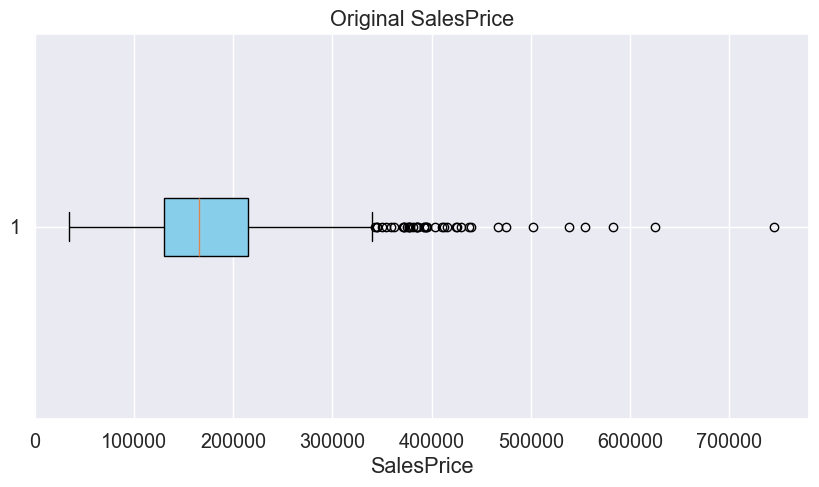

In [171]:
# Original SalesPrice boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(y_train_linear, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Original SalesPrice")
plt.xlabel("SalesPrice")

Text(0.5, 0, 'SalesPrice')

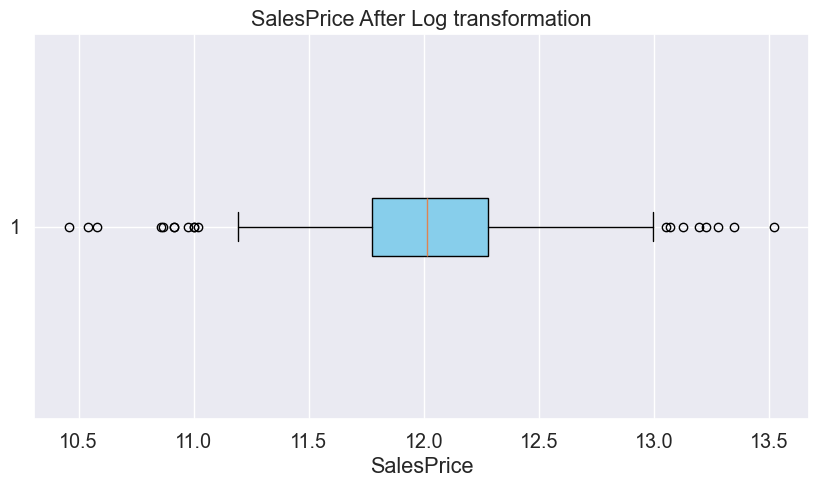

In [172]:
# Boxplot for SalesPrice (original and transformed)
plt.figure(figsize=(10, 5))

# Transformed SalesPrice boxplot
plt.boxplot(y_train_log, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("SalesPrice After Log transformation")
plt.xlabel("SalesPrice")

### Treatment of Outliers in data

In [174]:
#  outliers 
q1 = y_train_log.quantile(0.25)
q3 = y_train_log.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = y_train_log[(y_train_log < lower_bound) | (y_train_log > upper_bound)]
print(f'The number of outliers: {outliers.count()}')

# Print shapes to confirm alignment
print(f"Original X_train shape: {X_train_linear.shape}")
print(f"Original y_train shape: {y_train_log.shape}")

The number of outliers: 19
Original X_train shape: (1022, 73)
Original y_train shape: (1022,)


A log transformation compresses extreme values, reducing the influence of outliers on the model. Since the transformed data is already symmetric and the outliers no longer have a significant impact, additional removal may not be needed.

### Retrain the Model after log transformation

#### Retraining Linear Model after log transformation

In [178]:
# Train the model
linear_model2 = LinearRegression()
linear_model2.fit(X_train_linear, y_train_log)

LinearRegression()

In [179]:
joblib_file = './model_saved/linear_model2.joblib'
joblib.dump(linear_model2, joblib_file)

['./model_saved/linear_model2.joblib']

Since the model is trained on the log-transformed scale of Y, it will predict the value in the same scale which needs to be reverse to check the actual value and predicted value in the validation dataset.

#### Retraining Lasso Model after log transformation

In [182]:
# Initialize the Lasso Regression model
lasso_model2 = Lasso(alpha=10, max_iter=10000) 

# Fit the model to the training data
lasso_model2.fit(X_train_linear, y_train_log)

Lasso(alpha=10, max_iter=10000)

In [183]:
joblib_file = './model_saved/lasso_model2.joblib'
joblib.dump(lasso_model2, joblib_file)

['./model_saved/lasso_model2.joblib']

#### Retraining SVR Model after log transformation

In [185]:
svr2 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr2.fit(X_train_linear, y_train_log)

SVR()

In [186]:
joblib_file = './model_saved/svr2.joblib'
joblib.dump(svr2, joblib_file)

['./model_saved/svr2.joblib']

#### Retraining Random Forest Regressor Model after log transformation

In [188]:
# Transform target
y_train_log = np.log1p(y_train_tree)
y_test_log  = np.log1p(y_test_tree)

rf_model_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_log.fit(X_train_linear, y_train_log)

RandomForestRegressor(random_state=42)

In [189]:
 joblib_file = './model_saved/rf2.joblib'
joblib.dump(rf_model_log, joblib_file)

['./model_saved/rf2.joblib']

## Evaluation of Retrained Model

### Evaluation of Linear Regression model after retraining

In [192]:
# Predict in log scale
y_val_pred_log_linear = linear_model2.predict(X_test_linear)

# Reverse log transformation to get predictions in original scale
y_val_pred_linear = np.expm1(y_val_pred_log_linear)

# Evaluate using original target values
mse_linear_log = mean_squared_error(y_test_linear, y_val_pred_linear)
mae_linear_log = mean_absolute_error(y_test_linear, y_val_pred_linear)
rmse_linear_log = np.sqrt(mse_linear_log)
r2_linear_log = r2_score(y_test_linear, y_val_pred_linear)

print("Linear Regression (Log-Transformed Target) Metrics:")
print(f"  MSE: {mse_linear_log:.4f}") #.4f means 4 decimal points
print(f"  RMSE: {rmse_linear_log:.4f}")
print(f"MAE: {mae_linear_log:.4f}")
print(f"  R²: {r2_linear_log:.4f}")

Linear Regression (Log-Transformed Target) Metrics:
  MSE: 740585396.3791
  RMSE: 27213.6987
MAE: 18633.3623
  R²: 0.8939


### Evaluation of Lasso Regression model after retraining

In [194]:
# Predict in log scale
y_val_pred_log_lasso = lasso_model2.predict(X_test_linear)

# Convert predictions back to original scale
y_val_pred_lasso = np.expm1(y_val_pred_log_lasso)

# Evaluate on original target scale
mse_lasso_log = mean_squared_error(y_test_linear, y_val_pred_lasso)
mae_linear_log = mean_absolute_error(y_test_linear, y_val_pred_linear)
rmse_lasso_log = np.sqrt(mse_lasso_log)
r2_lasso_log = r2_score(y_test_linear, y_val_pred_lasso)

print("Lasso (Log-Transformed Target) Metrics:")
print(f"  MSE: {mse_lasso_log:.4f}")
print(f"  RMSE: {rmse_lasso_log:.4f}")
print(f"MAE: {mae_linear_log:.4f}")
print(f"  R²: {r2_lasso_log:.4f}")

Lasso (Log-Transformed Target) Metrics:
  MSE: 2023529889.3737
  RMSE: 44983.6625
MAE: 18633.3623
  R²: 0.7100


### Evaluation of SVR model after retraining

In [196]:
# Predict in log scale
y_val_pred_log_svr = svr2.predict(X_test_linear)

# Invert predictions to original scale
y_val_pred_svr = np.expm1(y_val_pred_log_svr)

# Evaluate
mse_svr_log = mean_squared_error(y_test_linear, y_val_pred_svr)
rmse_svr_log = np.sqrt(mse_svr_log)
r2_svr_log = r2_score(y_test_linear, y_val_pred_svr)
mae_linear_log = mean_absolute_error(y_test_linear, y_val_pred_linear)


print("SVR (Log-Transformed Target) Metrics:")
print(f"  MSE: {mse_svr_log:.4f}")
print(f"  RMSE: {rmse_svr_log:.4f}")
print(f"MAE: {mae_linear_log:.4f}")
print(f"  R²: {r2_svr_log:.4f}")

SVR (Log-Transformed Target) Metrics:
  MSE: 1530843404.2172
  RMSE: 39125.9940
MAE: 18633.3623
  R²: 0.7806


### Evaluation of Random Forest Regression model after retraining

In [198]:
# Predict in log scale
y_val_pred_log_rf = rf_model_log.predict(X_test_tree)

# Invert predictions back to original scale
y_val_pred_rf = np.expm1(y_val_pred_log_rf)

# Evaluate
mse_rf_log = mean_squared_error(y_test_tree, y_val_pred_rf)
mae_rf_log = mean_absolute_error(y_test_tree, y_val_pred_rf)
rmse_rf_log = np.sqrt(mse_rf_log)
r2_rf_log = r2_score(y_test_tree, y_val_pred_rf)


print("Random Forest (Log-Transformed Target) Metrics:")
print(f"  MSE: {mse_rf_log:.4f}")
print(f"  RMSE: {rmse_rf_log:.4f}")
print(f"MAE: {mae_rf_log:.4f}")
print(f"  R²: {r2_rf_log:.4f}")

Random Forest (Log-Transformed Target) Metrics:
  MSE: 693908155.6876
  RMSE: 26342.1365
MAE: 16371.6189
  R²: 0.9006


### Hyperparameter Tuning
Hyperparameter tuning is the process of finding the best combination of hyperparameters for a model to improve its performance.
In this project, GridSearchCV is used.

### Hyperparameter tuning of Lasso

In [202]:
# Data & Parameter Settings

X_train_sample = X_train_linear  # Features for training
y_train_sample = y_train_linear  # Target (if this is log-transformed, rename accordingly)

# Define parameter grids
param_grids = {
    'Lasso': {
        'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'max_iter': [1000, 5000, 10000]    # Number of iterations
    }
}

# Define models to tune
models = {
    'Lasso': Lasso(random_state=42)
}

best_models = {}  # Dictionary to store best models for each algorithm

# Hyperparameter Tuning Loop
for name, model in models.items():
    print(f"Hyperparameter tuning for {name}")
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='r2',   # Or "neg_mean_squared_error", etc.
        cv=5,           # 5-fold cross-validation
        verbose=1,
        n_jobs=-1       # Use all available CPU cores
    )
    
    # Fit on training data
    grid_search.fit(X_train_sample, y_train_sample)

    # Print results
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score (R²): {grid_search.best_score_:.4f}\n")
    
    # Store the best estimator
    best_models[name] = grid_search.best_estimator_

Hyperparameter tuning for Lasso
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for Lasso: {'alpha': 100, 'max_iter': 1000}
Best cross-validation score (R²): 0.7296



C:\Users\nepal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.584e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


## Evaluation Plots

### Residual Plot
A residual plot shows the difference between the actual and predicted values (Residual = Actual - Predicted) to assess whether the model errors are random.

In [255]:
models = {
    'Linear Regression': linear_model2,
    'SVR': svr2,
    'Random Forest Regression': rf_model_log,
    'Lasso': lasso_model2
}

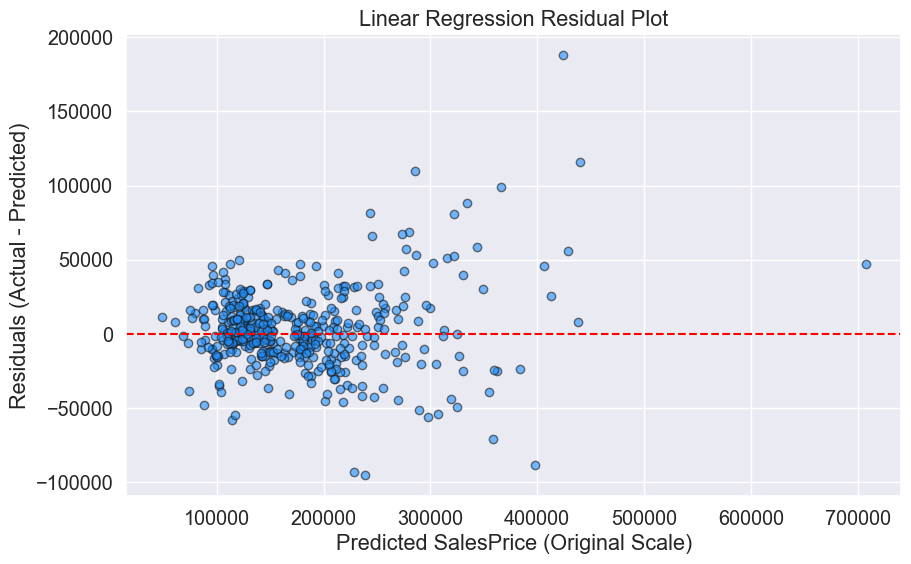

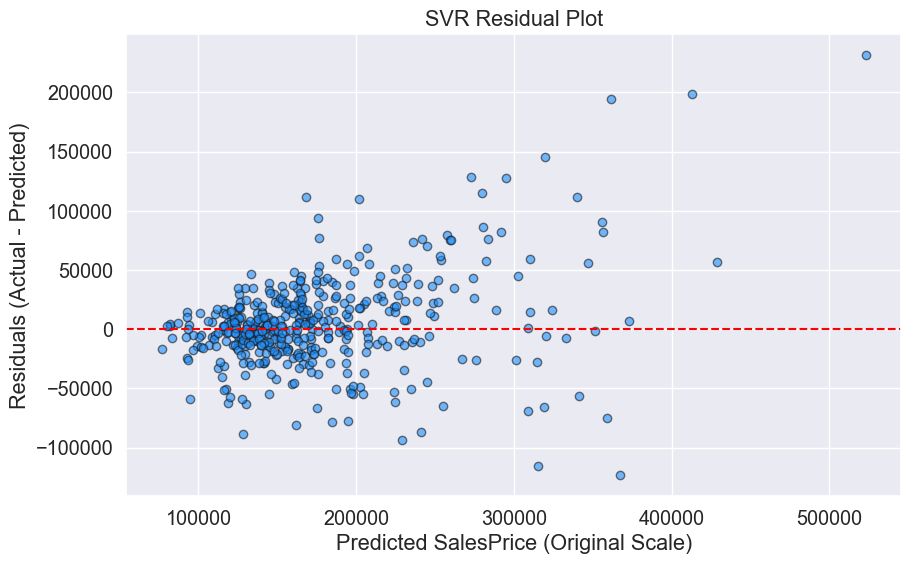

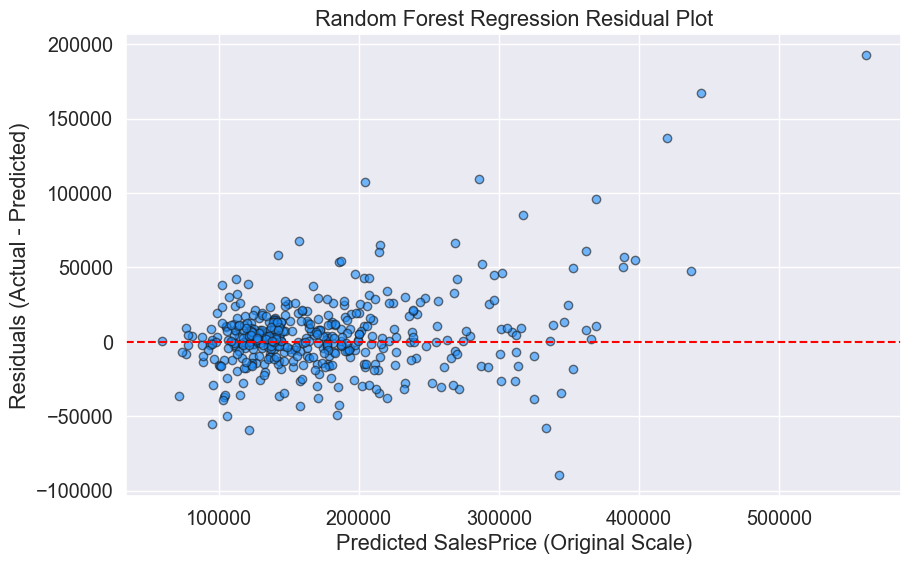

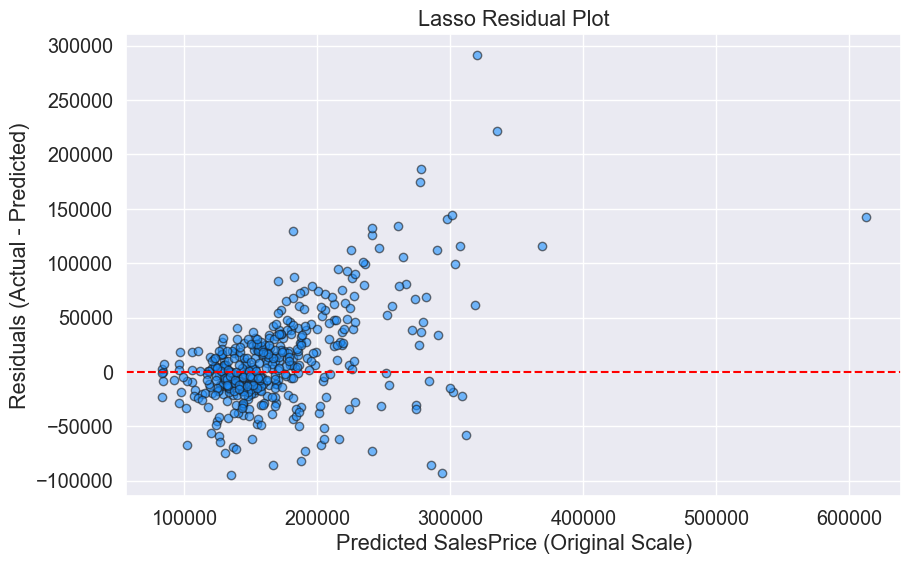

In [257]:
# Loop through your best models (Lasso, SVR, etc.)
for name, model in models.items():
    # Predict in log scale
    y_pred_log = model.predict(X_test_linear)
    
    # Convert back to the original scale
    y_pred_original = np.expm1(y_pred_log)
    
    # Calculate residuals (actual - predicted)
    residuals = y_test_linear - y_pred_original
    
    # Plot residuals vs. predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_original, residuals, alpha=0.6, color='dodgerblue',edgecolor='k')
    plt.axhline(y=0, color='red', linestyle='--')  # Reference line for residual=0
    plt.xlabel("Predicted SalesPrice (Original Scale)")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"{name} Residual Plot")
    plt.show()

### Actual vs Predicted Plot
This plot compares actual target values to predicted values to evaluate the model's performance visually.

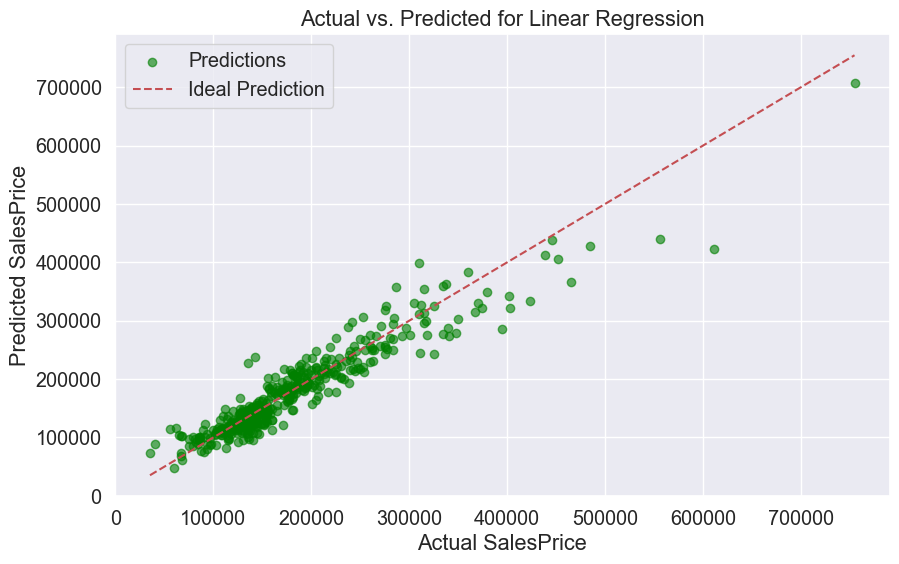

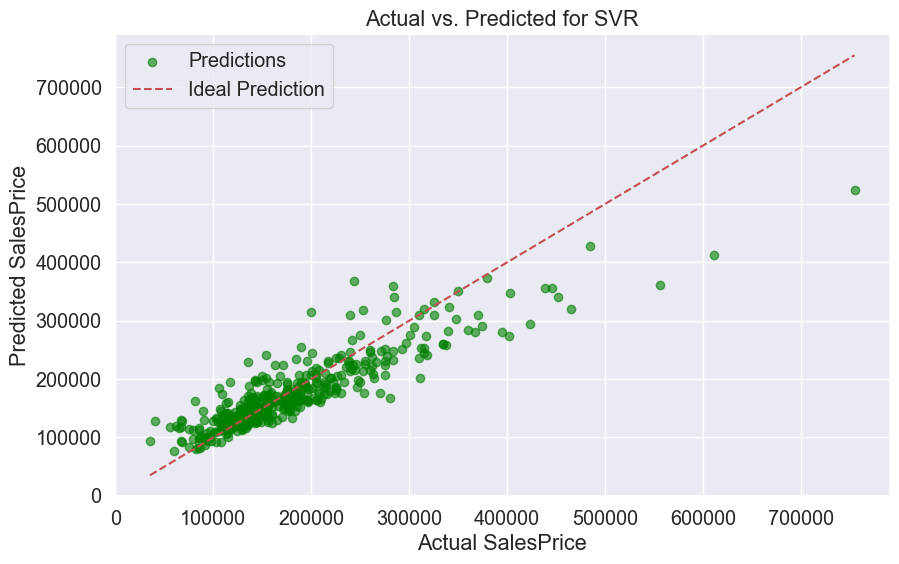

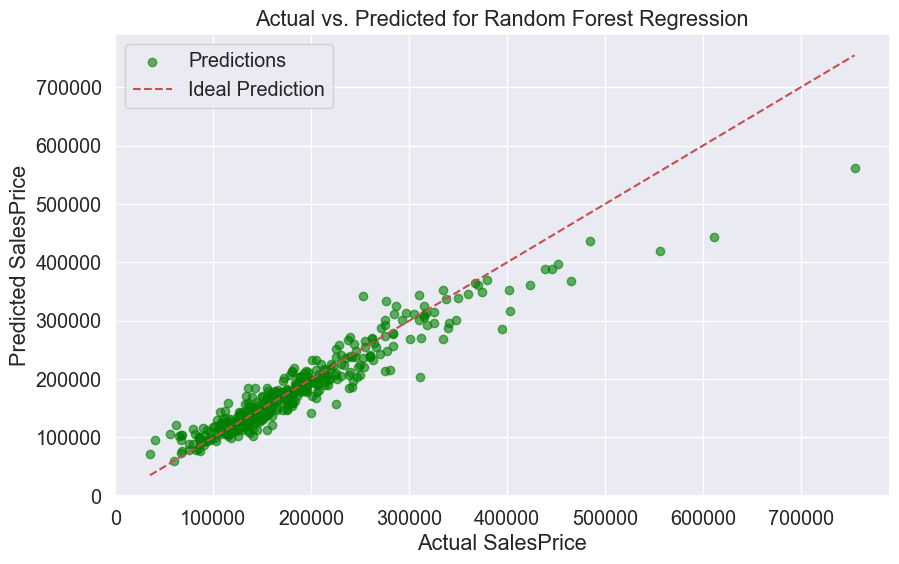

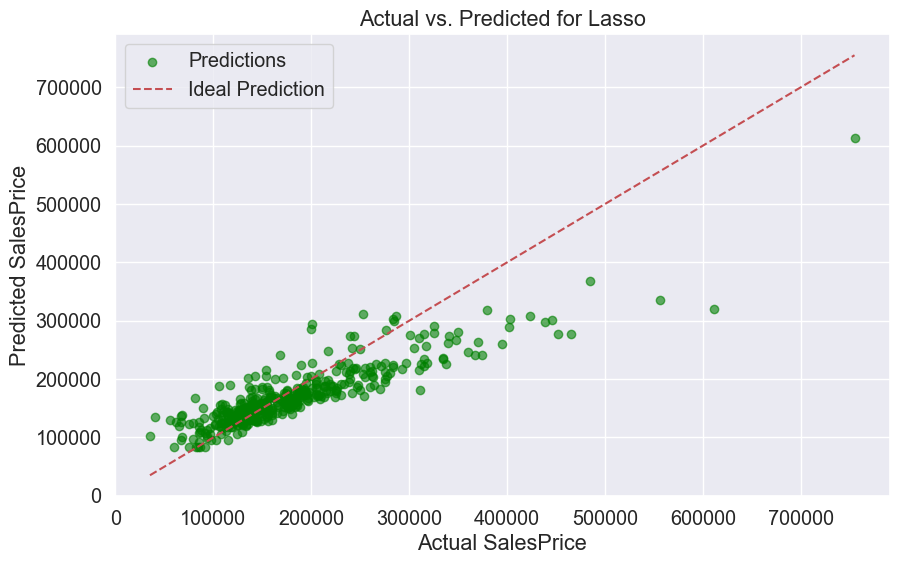

In [245]:
# Iterate through the models and visualize actual vs. predicted values
for name, model in models.items():
    # Predict in log scale (since models trained on log1p(y))
    y_pred_log = model.predict(X_test_linear)
    
    # Convert predictions back to the original scale
    y_pred_original = np.expm1(y_pred_log)
    
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of actual vs. predicted values
    plt.scatter(y_test_linear, y_pred_original, alpha=0.6, color='green', label='Predictions')
    
    # Ensure the axes cover the range of actual and predicted values
    max_val = max(y_test_linear.max(), y_pred_original.max())
    min_val = min(y_test_linear.min(), y_pred_original.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')
    
    # Title, labels, and legend
    plt.title(f"Actual vs. Predicted for {name}")
    plt.xlabel("Actual SalesPrice")
    plt.ylabel("Predicted SalesPrice")
    plt.legend()
    
    # Display the plot
    plt.show()

### Display Important Features
It shows the importance of each feature in a trained model. This works best with model like Random Forest.

In [278]:
# Check if the model has feature importances
if hasattr(rf_model_log, "feature_importances_"):
    # Create a DataFrame with feature names and their importance values
    feature_importance = pd.DataFrame({
        'Feature': X_train_tree.columns,  # Use the same features used for training
        'Importance': rf_model_log.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    # Display the sorted feature importance
    print("Feature Importance (Top Features):")
    print(feature_importance.head(20))  # Display top 10 features for brevity
else:
    print("The model does not support feature importance.")

Feature Importance (Top Features):
         Feature  Importance
15   OverallQual    0.552242
43     GrLivArea    0.097957
57    GarageCars    0.045197
35   TotalBsmtSF    0.033791
58    GarageArea    0.029555
40      1stFlrSF    0.022083
31    BsmtFinSF1    0.020129
3        LotArea    0.016044
54    GarageType    0.014215
18  YearRemodAdd    0.012461
17     YearBuilt    0.011398
16   OverallCond    0.009387
41      2ndFlrSF    0.008865
55   GarageYrBlt    0.008709
27      BsmtQual    0.008448
38    CentralAir    0.008039
2    LotFrontage    0.006413
10  Neighborhood    0.006106
63   OpenPorchSF    0.005544
34     BsmtUnfSF    0.005473


#### Key Insights
- OverallQual has the highest impact, showing that the material and finish quality of the house is the strongest determinant of price.
- GrLivArea (above-ground living space) significantly influences price, highlighting that larger homes are valued higher.
- Features like GarageCars and GarageArea emphasize that garage size and capacity are important selling points.
- TotalBsmtSF and BsmtFinSF1 reveal that a larger, finished basement contributes meaningfully to home value.
- While less impactful, Neighborhood still plays a role, suggesting that location factors like amenities or reputation affect property prices.

## Conclusion

The problem of predicting house prices is multifaceted which are influenced by data complexity, market dynamics, and feature interactions. Machine learning provides a robust framework to tackle these challenges by offering accurate, scalable, and adaptable solutions. By applying these methods, this project aims to create a reliable tool for predicting house prices and providing valuable insights for stakeholders in the real estate market.

In conclusion, the best performing model remain to be Random Forest Regression followed by Linear Regression, Lasso Regression and SVR. In this project, I followed the development cycle of the model training from collection of data to tuning parameters of data to visualization of predicted values.